In [1]:
## PART 2
import pandas as pd


df = pd.read_csv('troop_movements.csv')

df.head()



,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-08 14:18:37,1,at-at,resistance,3,2,9,9,Sullust
1,2025-07-08 14:18:36,2,at-at,empire,2,7,10,10,Concord Dawn
2,2025-07-08 14:18:35,3,resistance_soldier,empire,6,5,3,8,Tatooine
3,2025-07-08 14:18:34,4,tie_fighter,empire,5,4,10,4,Concord Dawn
4,2025-07-08 14:18:33,5,unknown,resistance,5,7,5,10,Socorro


In [2]:
df["empire_or_resistance"].value_counts().reset_index()
 

,empire_or_resistance,count
0,empire,509
1,resistance,491


In [3]:
df["homeworld"].value_counts().reset_index()

,homeworld,count
0,Bestine IV,37
1,Ojom,36
2,Corellia,31
3,Tholoth,31
4,Concord Dawn,30
5,Dorin,29
6,Umbara,29
7,Dathomir,28
8,Champala,27
9,Kashyyyk,27


In [4]:
df['unit_type'].value_counts().reset_index()

,unit_type,count
0,tie_silencer,138
1,tie_fighter,132
2,unknown,131
3,stormtrooper,128
4,resistance_soldier,122
5,x-wing,120
6,at-st,117
7,at-at,112


In [5]:
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-08 14:18:37,1,at-at,resistance,3,2,9,9,Sullust,True
1,2025-07-08 14:18:36,2,at-at,empire,2,7,10,10,Concord Dawn,False
2,2025-07-08 14:18:35,3,resistance_soldier,empire,6,5,3,8,Tatooine,False
3,2025-07-08 14:18:34,4,tie_fighter,empire,5,4,10,4,Concord Dawn,False
4,2025-07-08 14:18:33,5,unknown,resistance,5,7,5,10,Socorro,True


<Axes: xlabel='empire_or_resistance', ylabel='count'>

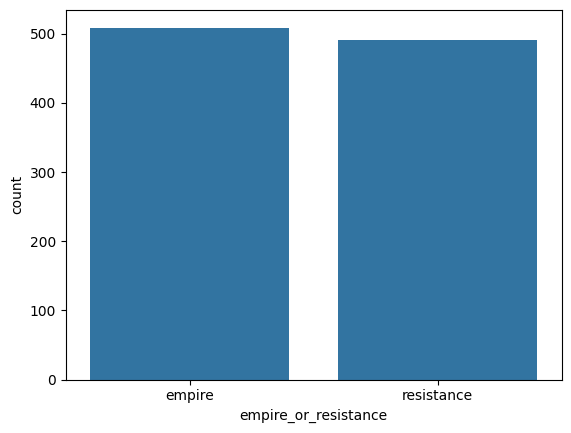

In [6]:
import seaborn as sns
import matplotlib as plt

sns.barplot(data= df["empire_or_resistance"].value_counts())

In [7]:
import sklearn
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

le = LabelEncoder()

df_dummy = pd.get_dummies(df[['homeworld', 'unit_type']])

X = df_dummy
y = df['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

dtc = sklearn.tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

preditction = dtc.predict(X_test)
print(accuracy_score(y_test, preditction))



0.665


In [12]:
importances = dtc.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

#sns.barplot(feature_importances)
X

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
